In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

dataset_id = "MSV000085959" # Indicate Dataset Here
# "MSV000086809", "PXD027742", "MSV000086004", "PXD016573", "PXD016057_and_PXD017626", "PXD020586", "MSV000085959"

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx"

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]

sdrf_df["label"] = sdrf_df["label"].astype(str)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                                'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                                'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*interact-(.+)\.pep\.xml$")
sdrf_df["File_Name"] = sdrf_df["file name"].str.extract(r"^(?:.+\\)*(.+)\.raw$")

datasets = psm_df["File_Name"].unique()

all_channels = ["126","127N","127C","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N","134C","135N"]

channels = []

info_dict = {}
for dataset in datasets:
    info_dict[dataset] = sdrf_df.loc[sdrf_df["File_Name"] == dataset]

first_info_df = info_dict[datasets[0]]
first_info_df.reset_index(drop=True, inplace=True)

for channel in all_channels:
    if first_info_df.index[first_info_df["label"] == channel].tolist():
        row = first_info_df.index[first_info_df["label"] == channel].tolist()[0]
        channel_type = first_info_df["type"].iloc[row]
        if (channel_type == "single"):
            channels.append(channel)

psm_df = pd.melt(psm_df, id_vars=["File_Name"], value_vars=channels)

data_dict = {}
for dataset in datasets:
    data_dict[dataset] = psm_df.loc[psm_df["File_Name"] == dataset]
    

print(channels)
# channels = ["127N","128N","128C","129N","129C","130N","130C"] # ,"131N","131C","132N","132C","133N","133C","134N"] #Excluding 126 and 127C because reasons

medians_df = pd.DataFrame(index=datasets, columns=channels)


for dataset in datasets:
    curr_df =  data_dict[dataset]
    for channel in channels:
        chan_df = curr_df.loc[curr_df["variable"] == channel]
        medians_df.at[dataset, channel] = chan_df['value'].median()
        
medians_df['Median'] = medians_df[channels].median(axis=1)

# psm_df
# sdrf_df
# first_info_df
medians_df


# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))

['127N', '128N', '128C', '129N', '129C', '130N', '130C', '131N']


,127N,128N,128C,129N,129C,130N,130C,131N,Median
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_1e6_1sec_01_Carrier75x_Fig3b,3648.0249,2952.1274,3350.2114,2991.8835,3562.1057,3606.9504,3621.0588,3419.0029,3490.554300
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_2e5_300msec_01_Carrier75x_Fig3b,3120.4353,2466.94715,2842.99025,2463.3523,3056.7555,3113.0626,3081.30935,2910.5991,2983.677300
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_5e5_750msec_01_Carrier75x_Fig3b,3928.72765,3127.6283,3562.2283,3138.4349,3901.5044,3897.8496,3944.7893,3694.318,3796.083800
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_1e6_1sec_01_Carrier300x_Fig3b,1161.5343,597.42045,898.9407,591.5261,695.1819,719.2447,704.2266,666.61705,699.704250
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_2e5_300msec_01_Carrier300x_Fig3b,1002.009,461.7264,845.5251,454.4518,554.5934,578.9092,551.5826,527.1406,553.088000
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_5e5_750msec_01_Carrier300x_Fig3b,1251.2917,580.6063,953.5844,578.1207,723.9415,710.2462,737.7537,674.116,717.093850
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_1e6_1sec_02_Carrier5x_Fig3b,26273.3584,25177.07225,25054.36915,26426.7402,33655.16015,34832.7461,29558.8066,33032.4258,27992.773400
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_2e5_300msec_01_Carrier5x_Fig3b,26396.7793,24474.877,24861.4414,25348.4434,31514.6133,32306.8652,31558.3496,30529.6621,28463.220700
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_5e5_750msec_01_Carrier5x_Fig3b,29207.8652,26966.3984,27265.2969,28497.1562,36131.0977,37117.6211,35063.4102,35249.8438,32135.637700
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD48_1e6_1sec_01_Carrier900x_Fig3b,807.3539,224.6747,549.4808,221.8645,241.7097,244.1874,249.9609,240.0826,242.948550


In [2]:
variance_df = pd.DataFrame(index=datasets, columns=channels)

for dataset in datasets:
    for channel in channels:
        variance_df.at[dataset, channel] = medians_df.at[dataset, channel] / medians_df.at[dataset, "Median"]

# sigmas = variance_df[channels].std()
sigma = np.nanstd(variance_df[channels])
mean = np.nanmean(variance_df[channels])
# print(sigmas)
print(sigma)
print(mean)

# for dataset in datasets:
#     for channel in channels:
#         curr_col = variance_df[channel]
#         variance_df = variance_df[(curr_col <= mean+(5*sigma))]
#         
#         if (variance_df.at[dataset, channel] > mean+(5*sigma)): 
#             variance_df.at[dataset, channel] = np.nan
            
        
variance_df
# variance_df.to_csv("variance.csv")

nan
inf


C:\Users\conno\AppData\Local\Temp\ipykernel_21324\1063283651.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  variance_df.at[dataset, channel] = medians_df.at[dataset, channel] / medians_df.at[dataset, "Median"]
C:\Users\conno\AppData\Local\Temp\ipykernel_21324\1063283651.py:5: RuntimeWarning: invalid value encountered in double_scalars
  variance_df.at[dataset, channel] = medians_df.at[dataset, channel] / medians_df.at[dataset, "Median"]
C:\Users\conno\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  np.subtract(arr, avg, out=arr, casting='unsafe')


,127N,128N,128C,129N,129C,130N,130C,131N
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_1e6_1sec_01_Carrier75x_Fig3b,1.045113,0.845747,0.959794,0.857137,1.020499,1.033346,1.037388,0.979501
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_2e5_300msec_01_Carrier75x_Fig3b,1.045835,0.826814,0.952848,0.825609,1.024493,1.043364,1.032722,0.975507
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_5e5_750msec_01_Carrier75x_Fig3b,1.034942,0.823909,0.938396,0.826756,1.027771,1.026808,1.039173,0.973192
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_1e6_1sec_01_Carrier300x_Fig3b,1.660036,0.853819,1.284744,0.845394,0.993537,1.027927,1.006463,0.952713
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_2e5_300msec_01_Carrier300x_Fig3b,1.811663,0.834815,1.528735,0.821663,1.002722,1.046686,0.997278,0.953086
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_5e5_750msec_01_Carrier300x_Fig3b,1.744948,0.809666,1.32979,0.806199,1.009549,0.990451,1.028811,0.940067
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_1e6_1sec_02_Carrier5x_Fig3b,0.938576,0.899413,0.89503,0.944056,1.20228,1.244348,1.055944,1.180034
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_2e5_300msec_01_Carrier5x_Fig3b,0.9274,0.859877,0.873458,0.890568,1.107205,1.135039,1.108741,1.0726
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_5e5_750msec_01_Carrier5x_Fig3b,0.908893,0.839143,0.848444,0.886777,1.124331,1.15503,1.091107,1.096908
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD48_1e6_1sec_01_Carrier900x_Fig3b,3.323148,0.924783,2.261717,0.913216,0.994901,1.005099,1.028864,0.988203


In [3]:
boost_volumes = set()

variance_df["Carrier Volume"] = ''

# variance_df["Injection Time"] = ''

for dataset in datasets:
    info_df = info_dict[dataset]
    
    info_df.reset_index(drop=True, inplace=True)
    
    all_channels = info_df["label"]
    boost_volume = 0
    
    for channel in all_channels:
        row = info_df.index[info_df["label"] == channel].tolist()[0]
        channel_type = info_df["type"].iloc[row]
        if (channel_type == "boost"):
            boost_volume += info_df["cell_equivalents"].iloc[row]
    
    boost_volumes.add(boost_volume)
    
#     if "300ms" in dataset:
#         variance_df.at[dataset, "Injection Time"] = "300ms"
#         
#     elif "500ms" in dataset:
#         variance_df.at[dataset, "Injection Time"] = "500ms"
    
    variance_df.at[dataset, "Carrier Volume"] = boost_volume
    
variance_df["Carrier Volume"] = pd.to_numeric(variance_df["Carrier Volume"], errors='coerce')
variance_df.sort_values(by=["Carrier Volume"], ascending=True)

variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(int)
# variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(str) + "x"


print(boost_volumes)

variance_df


{900.0, 5.0, 75.0, 300.0, 20.0, 3000.0}


,127N,128N,128C,129N,129C,130N,130C,131N,Carrier Volume
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_1e6_1sec_01_Carrier75x_Fig3b,1.045113,0.845747,0.959794,0.857137,1.020499,1.033346,1.037388,0.979501,75
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_2e5_300msec_01_Carrier75x_Fig3b,1.045835,0.826814,0.952848,0.825609,1.024493,1.043364,1.032722,0.975507,75
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD12_5e5_750msec_01_Carrier75x_Fig3b,1.034942,0.823909,0.938396,0.826756,1.027771,1.026808,1.039173,0.973192,75
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_1e6_1sec_01_Carrier300x_Fig3b,1.660036,0.853819,1.284744,0.845394,0.993537,1.027927,1.006463,0.952713,300
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_2e5_300msec_01_Carrier300x_Fig3b,1.811663,0.834815,1.528735,0.821663,1.002722,1.046686,0.997278,0.953086,300
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD24_5e5_750msec_01_Carrier300x_Fig3b,1.744948,0.809666,1.32979,0.806199,1.009549,0.990451,1.028811,0.940067,300
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_1e6_1sec_02_Carrier5x_Fig3b,0.938576,0.899413,0.89503,0.944056,1.20228,1.244348,1.055944,1.180034,5
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_2e5_300msec_01_Carrier5x_Fig3b,0.9274,0.859877,0.873458,0.890568,1.107205,1.135039,1.108741,1.0726,5
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD3_5e5_750msec_01_Carrier5x_Fig3b,0.908893,0.839143,0.848444,0.886777,1.124331,1.15503,1.091107,1.096908,5
20191004_Lum1_OBJ0039421_QLSCOUT_SCOPE_HK_8plex_RD48_1e6_1sec_01_Carrier900x_Fig3b,3.323148,0.924783,2.261717,0.913216,0.994901,1.005099,1.028864,0.988203,900


In [4]:
counts_df = pd.DataFrame(index=["Above","Below", "Average", "St Dev"], columns=channels)

for channel in channels:
    column = variance_df[channel]
    counts_df.at["Above", channel] = column[column > 1.00].count()
    counts_df.at["Below", channel] = column[column < 1.00].count()
    counts_df.at["Average", channel] = column.mean()
    counts_df.at["St Dev", channel] = column.std()
    
counts_df

,127N,128N,128C,129N,129C,130N,130C,131N
Above,12,0,9,0,12,12,13,6
Below,6,14,9,14,2,2,1,8
Average,inf,0.86275,inf,0.866945,1.054352,1.072616,1.054597,1.008794
St Dev,NaN,0.044826,NaN,0.040143,0.061862,0.071877,0.035237,0.076285


In [5]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
variance_df.reset_index(drop=True, inplace=True)

anova_df = pd.melt(variance_df.reset_index(), id_vars=['index'], value_vars=channels, ignore_index=False)

anova_df.columns = ['index', 'treatments', 'value']

res = stat()

anova_df



# res.anova_stat(df=anova_df, res_var='value', anova_model='value ~ C(treatments)')
# res.anova_summary


# output (ANOVA F and p value)
#                  df   sum_sq   mean_sq         F    PR(>F)
# C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
# Residual       16.0   918.00    57.375       NaN       NaN

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

,index,treatments,value
0,0,127N,1.045113
1,1,127N,1.045835
2,2,127N,1.034942
3,3,127N,1.660036
4,4,127N,1.811663
...,...,...,...
13,13,131N,1.034534
14,14,131N,1.053918
15,15,131N,NaN
16,16,131N,NaN


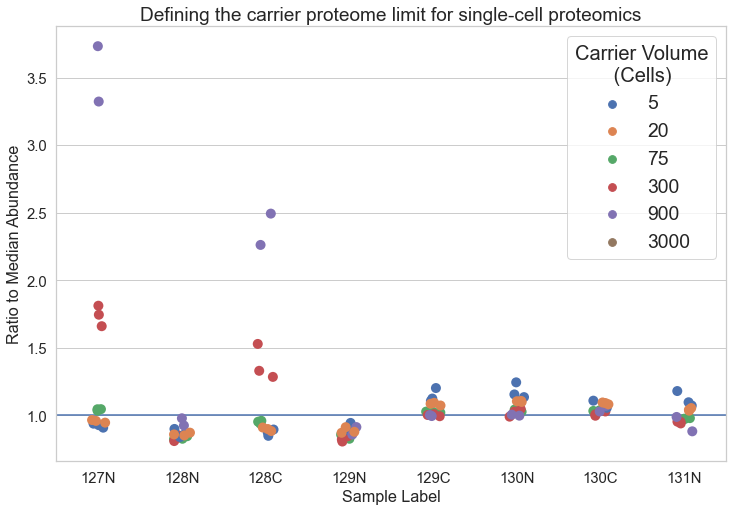

In [9]:
to_graph_df = pd.melt(variance_df, id_vars=["Carrier Volume"], value_vars=channels, ignore_index=False) # ,"131N","131C","132N","132C","133N","133C","134N"]
to_graph_df["Dataset"] = to_graph_df.index
to_graph_df

plt.figure(figsize=(12, 8)) # Original: (16, 8.27)

sns.set(font_scale=1.35)
sns.set_style("whitegrid")

if (len(boost_volumes) == 1):
    title = dataset_id + ": " + str(round(next(iter(boost_volumes)))) + "x Carrier"
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, color='0', s=10, 
                     order=channels) # "131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)
else:
    title = "Defining the carrier proteome limit for single-cell proteomics"    
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Carrier Volume", s=10, 
                     order=channels) # "131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)
    
    plt.legend(title="Carrier Volume\n       (Cells)", fontsize='large', title_fontsize='20') # , alignment="center") # Need to Update matplotlib
    
boxplot.set_title(title, fontsize=19)

plt.axhline(y=1)

boxplot.set(xlabel="Sample Label", ylabel="Ratio to Median Abundance") # Change y label

plt.savefig(dataset_id + "/" + dataset_id + "_median_figure.png", dpi=400)
plt.show()